# Appendix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import tensorflow
print(tensorflow.__version__)

2.15.0


In [2]:
from tensorflow.keras import backend as K
K.clear_session()

In [3]:
# Constants
N_CLASSES = 100
IMG_ROWS, IMG_COLS = 32, 32  # Image dimensions
IMG_CHANNELS = 3  # Number of color channels
BATCH_SIZE = 128
N_EPOCH = 100
VALIDATION_SPLIT = 0.2
VERBOSE = 1

In [4]:
# Load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()

# Preprocessing data
output_Y_train = to_categorical(output_y_train, N_CLASSES)
output_Y_test = to_categorical(output_y_test, N_CLASSES)

In [5]:
# Complex DNN model definition
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

In [6]:
OPTIM = Adam()

#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                       

In [7]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(input_X_train)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.4, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
# Define a model checkpoint callback
checkpoint = ModelCheckpoint('model_epoch_{epoch:02d}.keras', save_best_only=True, monitor='val_accuracy', mode='max')

In [9]:
# training/fitting of the complex DNN model
# history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

# Add Datagen
# history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE),
#                               steps_per_epoch=input_X_train.shape[0] // BATCH_SIZE,
#                               epochs=N_EPOCH,
#                               verbose=VERBOSE,
#                               validation_data=(input_X_test, output_Y_test))

# Add callbacks
history = model.fit(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch=input_X_train.shape[0] // BATCH_SIZE,
                              epochs=N_EPOCH,
                              verbose=VERBOSE,
                              validation_data=(input_X_test, output_Y_test),
                              callbacks=[checkpoint, reduce_lr, early_stopping])


Epoch 1/100
390/390 [==============================] - 35s 71ms/step - loss: 4.4137 - accuracy: 0.0473 - val_loss: 3.9979 - val_accuracy: 0.0938 - lr: 0.0010
Epoch 2/100
390/390 [==============================] - 26s 67ms/step - loss: 3.9067 - accuracy: 0.0998 - val_loss: 3.8054 - val_accuracy: 0.1181 - lr: 0.0010
Epoch 3/100
390/390 [==============================] - 26s 66ms/step - loss: 3.6478 - accuracy: 0.1431 - val_loss: 3.3868 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 4/100
390/390 [==============================] - 26s 67ms/step - loss: 3.4225 - accuracy: 0.1803 - val_loss: 3.1696 - val_accuracy: 0.2317 - lr: 0.0010
Epoch 5/100
390/390 [==============================] - 26s 67ms/step - loss: 3.2446 - accuracy: 0.2101 - val_loss: 2.9340 - val_accuracy: 0.2733 - lr: 0.0010
Epoch 6/100
390/390 [==============================] - 26s 67ms/step - loss: 3.0551 - accuracy: 0.2473 - val_loss: 2.5984 - val_accuracy: 0.3337 - lr: 0.0010
Epoch 7/100
390/390 [==============================]

79/79 [==============================] - 0s 4ms/step - loss: 1.3422 - accuracy: 0.6224

Test score/loss: 1.3421534299850464
Test accuracy: 0.6223999857902527
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


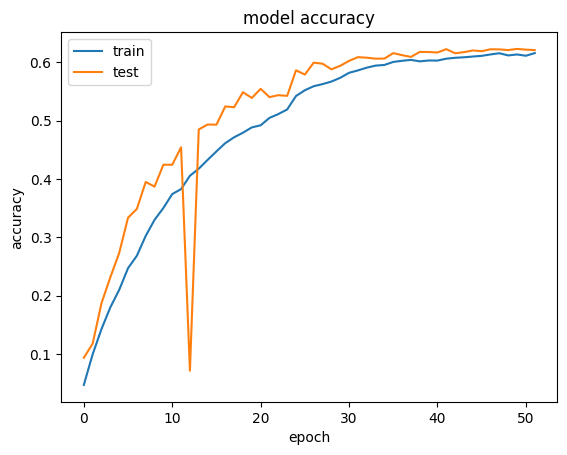

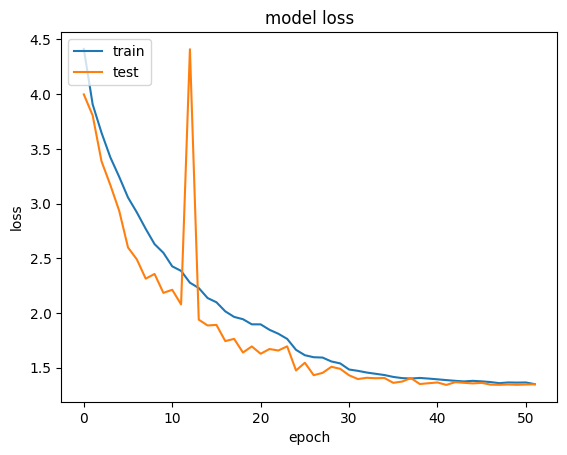

In [10]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

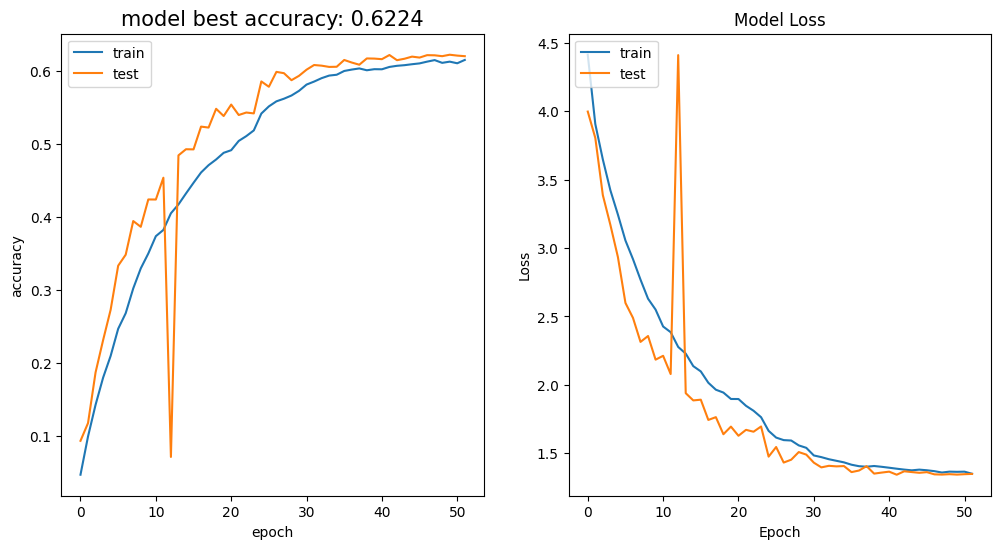

In [11]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f'model best accuracy: {score[1]:.4f}', fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()